# Data 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 57.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('drive/MyDrive/OpenBCI-RAW-2024-03-14_19-45-10.txt', delimiter = ',', skiprows=5)
data = df.to_numpy()

In [ ]:
sfreq = 250  # sample rate in Hz
data = np.delete(data, [12, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
#print(data[5, :-24])
data = data[:, :-1] # removes timestamp
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=19, n_times=136218
    Range : 0 ... 136217 =      0.000 ...   544.868 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[ 18172.92936718  18180.64071901  18186.65333827 ...  35940.28633121
   35962.81688962  35978.06077934]
 [-25010.01507163 -25003.93539714 -24992.71482142 ...  -1839.28034774
   -1833.20067325  -1831.09960927]
 [  9681.74751779   9689.86120103   9697.77371857 ...  34932.04384232
   34936.60359819  34944.02437735]
 ...
 [ 29825.31843487  29842.14929845  29850.30768517 ...  42553.56401844
   42570.26077154  42590.93613517]
 [ 39760.82530747  39770.86124073  39777.834985   ...  47348.54964597
   47364.86641942  47381.2502481 ]
 [ 39270.24922016  39292.17628147  39301.31814496 ...  47822.47368365
   47846.32299499  47873.16744008]]
NOTE: plot_psd() is a legacy 

<ipython-input-6-e632e1ec1755>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-6-e632e1ec1755>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


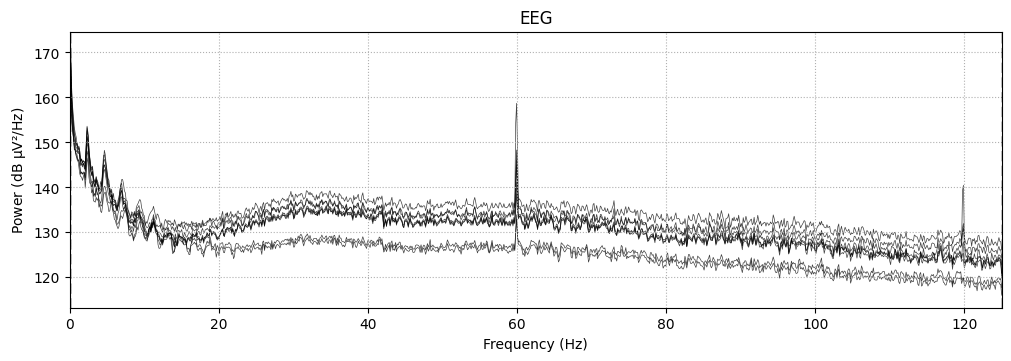

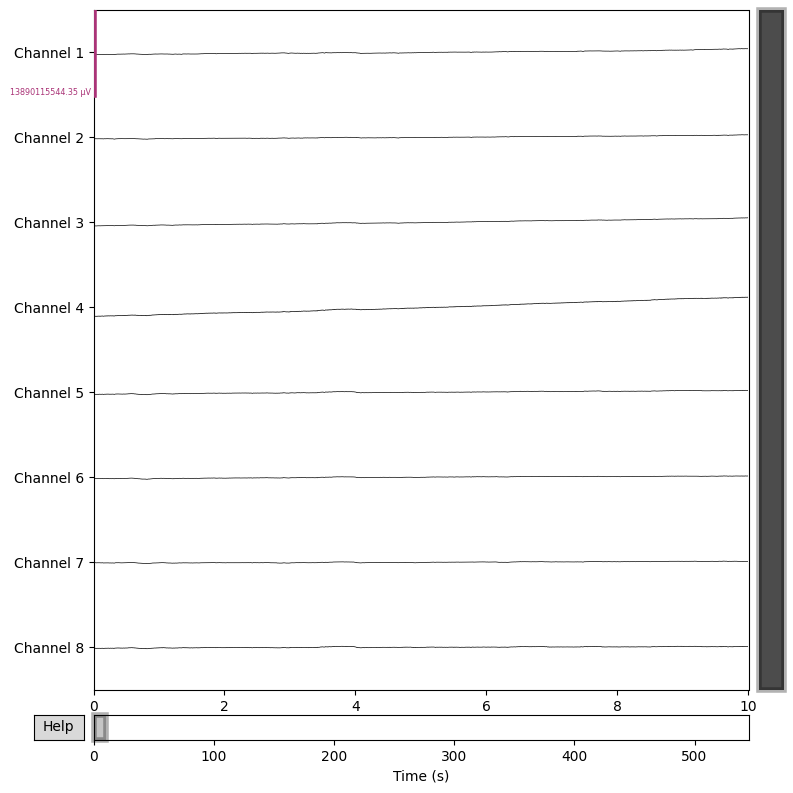

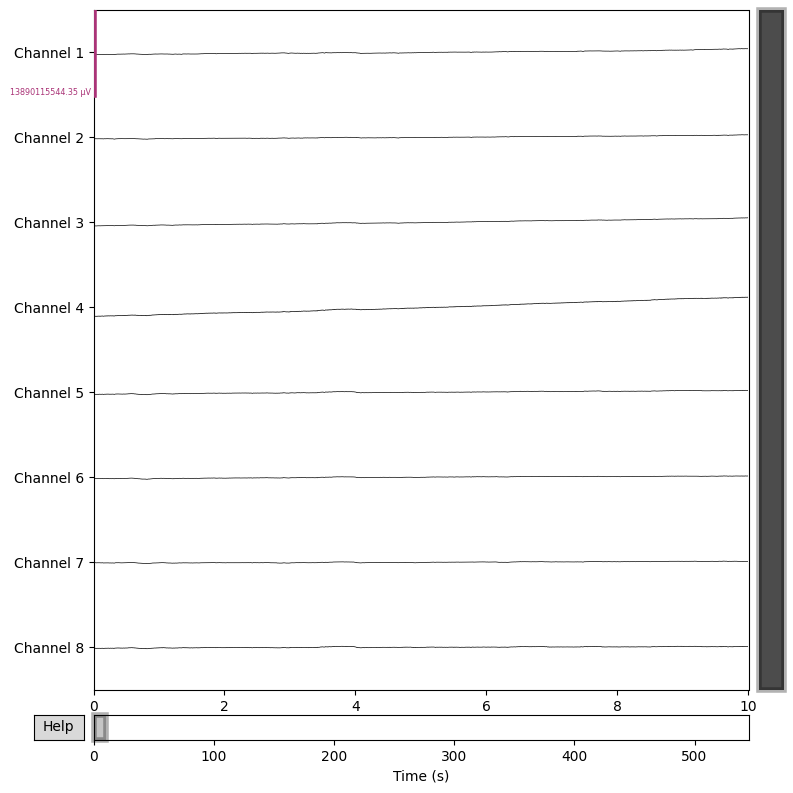

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge

<ipython-input-7-4d83db11d36f>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-7-4d83db11d36f>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


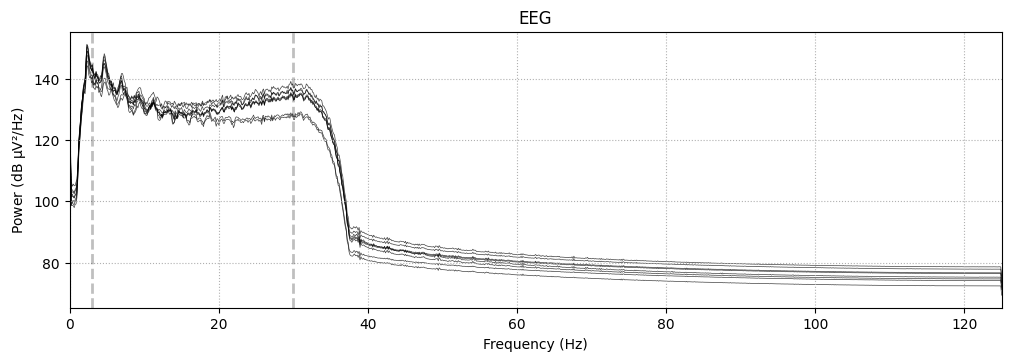

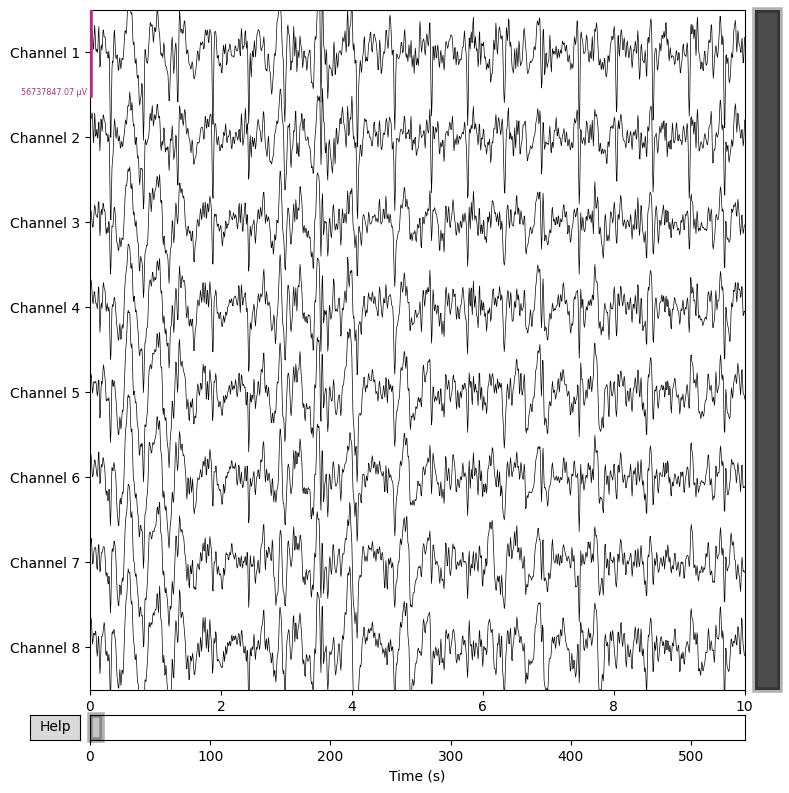

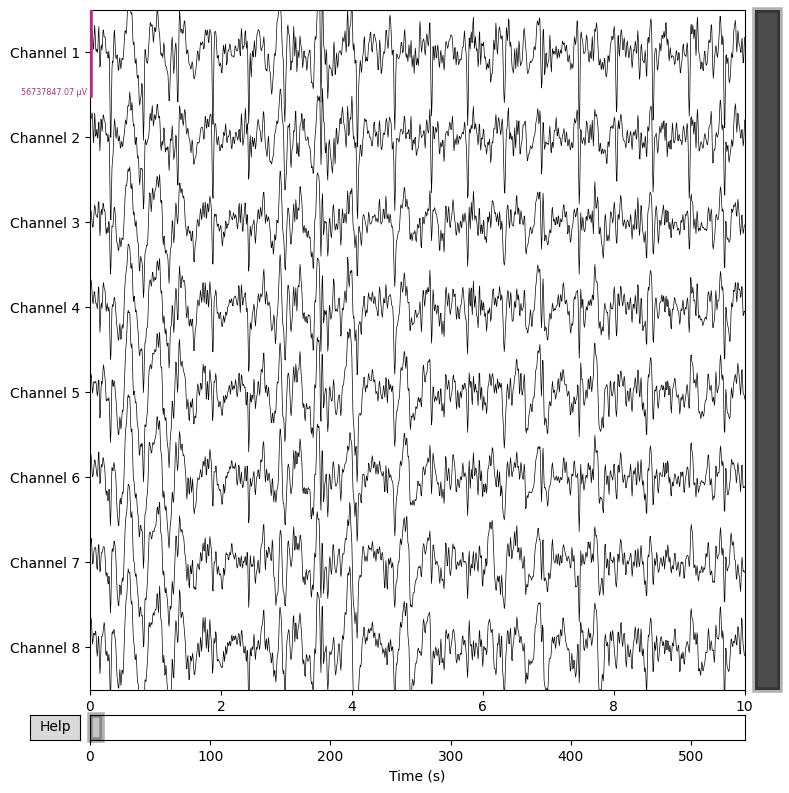

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)

# Research said filter to alpha/beta waves
raw.filter(l_freq=3, h_freq=30)
raw.plot_psd()
raw.plot(scalings='auto')

In [ ]:
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)
#print(filteredData[8])

# mark samples
list_of_times = [[25, 55], [71, 100], [116, 146], [165, 194], [210, 240], [256, 285], [302, 332], [347, 377], [392, 423], [438, 468], [485, 515]]
for interval in list_of_times:
  interval[0] *= sfreq
  interval[1] *= sfreq
for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    filteredData[8, i] = 1

# Data 2

In [ ]:
df_2 = pd.read_csv('drive/MyDrive/OpenBCI-RAW-2024-03-07_20-39-14.txt', delimiter = ',', skiprows=5)
data_2 = df_2.to_numpy()

In [ ]:
data_2 = np.delete(data_2, [12, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
print(data_2[2, :-24])
data_2 = data_2[:, :-1] # removes timestamp
ch_names_2 = ['Channel {}'.format(i) for i in range(data_2.shape[1])]
ch_types_2 = ['eeg' for i in range(data_2.shape[1])]

[]


In [ ]:
info_2 = mne.create_info(ch_names=ch_names_2, sfreq=sfreq, ch_types=ch_types_2)
raw_2 = mne.io.RawArray(data_2.T, info_2)

Creating RawArray with float64 data, n_channels=19, n_times=274466
    Range : 0 ... 274465 =      0.000 ...  1097.860 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[36324.53517014 36359.7615194  36359.31448451 ... 28053.6968176
  28048.15358498 27993.05653489]
 [41376.65526589 41363.82536457 41350.36961441 ... 37609.80517981
  37589.80036852 37594.47188311]
 [17435.03122747 17428.72803554 17416.76985225 ... 16728.09025384
  16715.05918682 16722.390559  ]
 ...
 [27557.89042209 27566.31702975 27560.68439015 ... 26193.24936786
  26182.92286192 26164.72854194]
 [ 9268.5084663   9269.3131291   9260.75241098 ...  6224.13381626
   6210.45454865  6202.31851367]
 [14864.46885639 15145.51969117 15216.37472109 ... 30595.20192089
  30747.64081808 30305.00922263]]
NOTE: plot_psd() is a legacy function. New code should use .comput

<ipython-input-12-9d4ff3532369>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_2.plot_psd()
<ipython-input-12-9d4ff3532369>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_2.plot_psd()


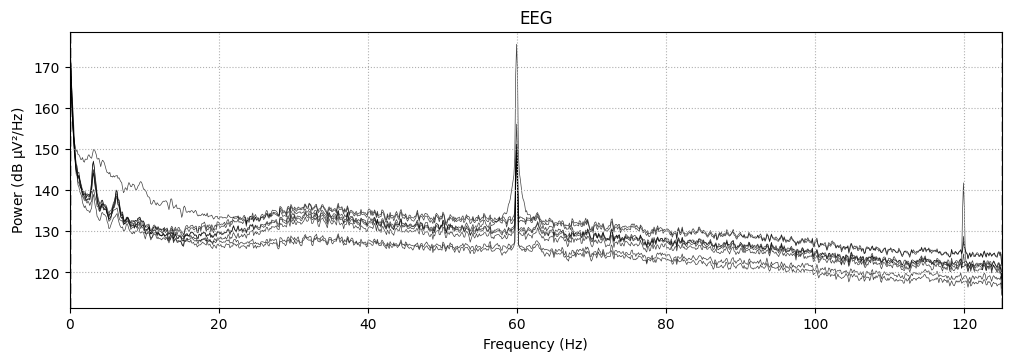

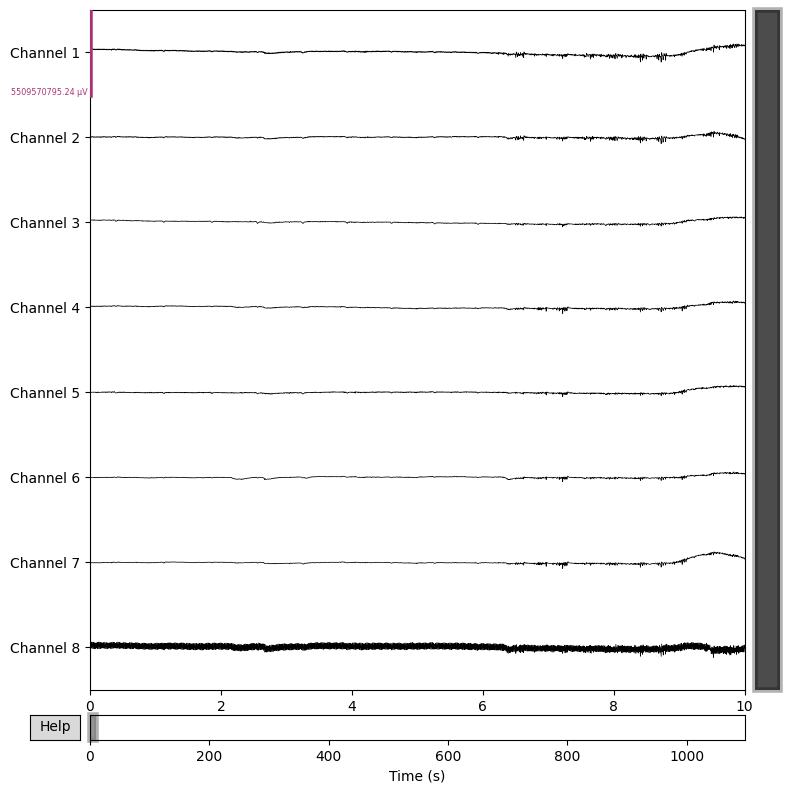

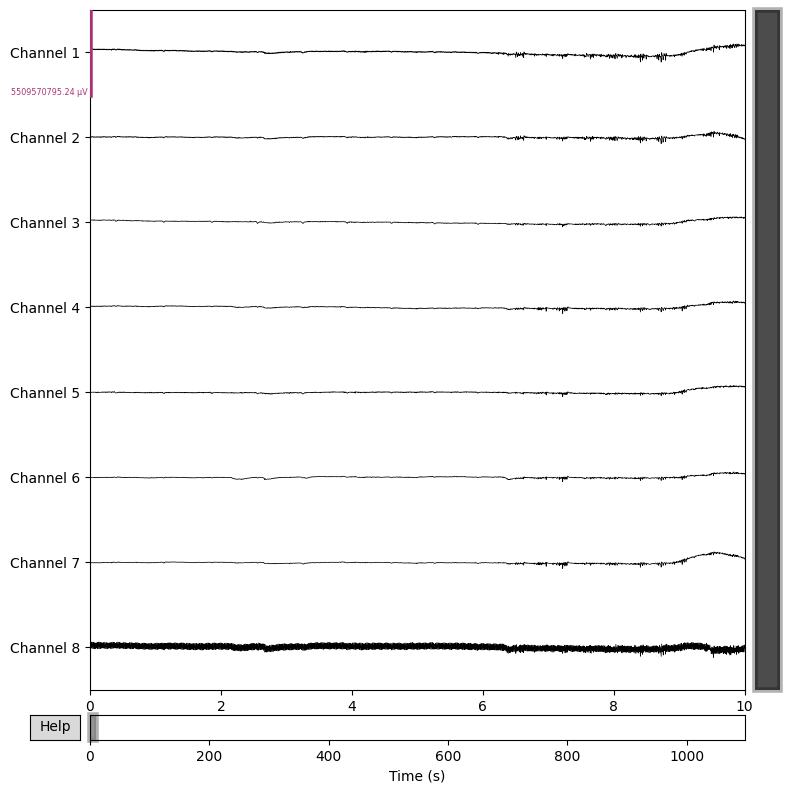

In [ ]:
ch_names_2 = [raw_2.ch_names]
ch_names_to_keep_2 = [ch_names_2[0][1:9]]
raw_2 = raw_2.pick_channels(ch_names_to_keep_2[0])
# Now you can work with the MNE Raw object
print(raw_2.info)
print(raw_2.get_data())
raw_2.plot_psd()
raw_2.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge

<ipython-input-13-54f7980eb84e>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_2.plot_psd()
<ipython-input-13-54f7980eb84e>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_2.plot_psd()


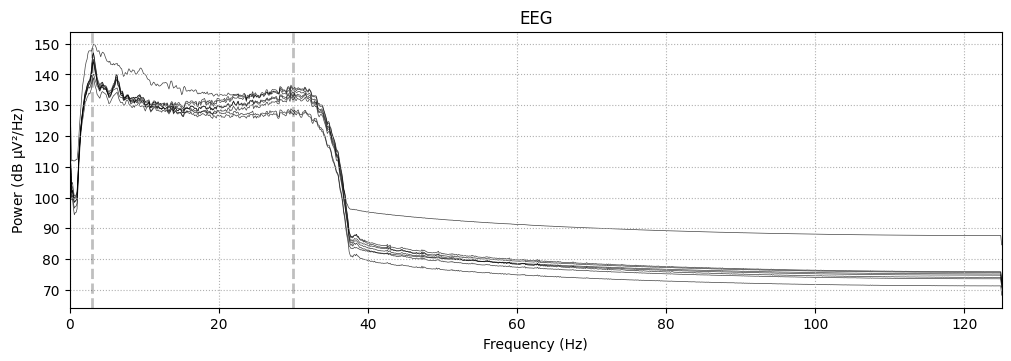

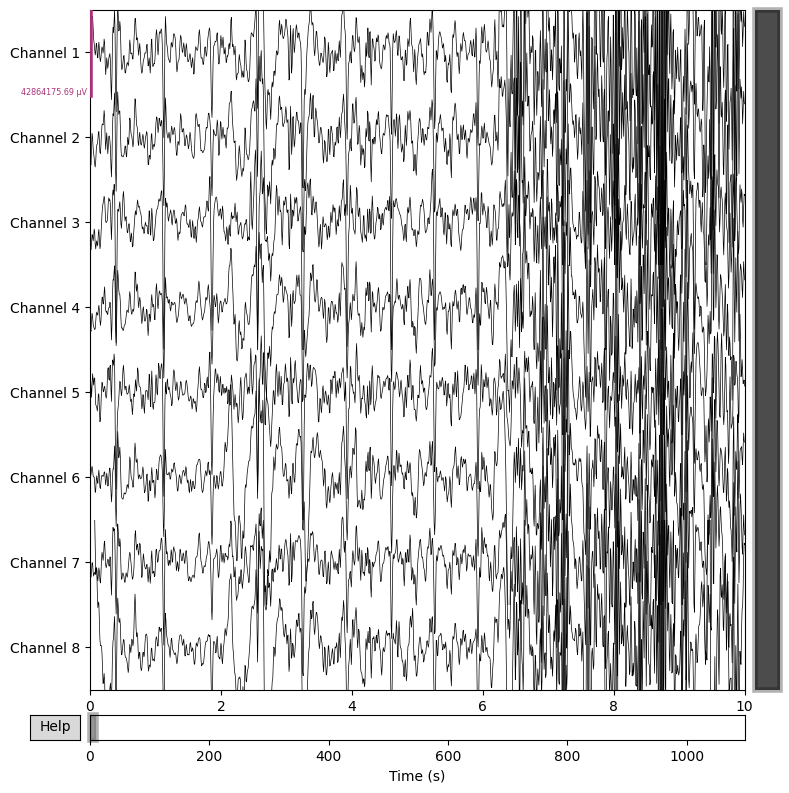

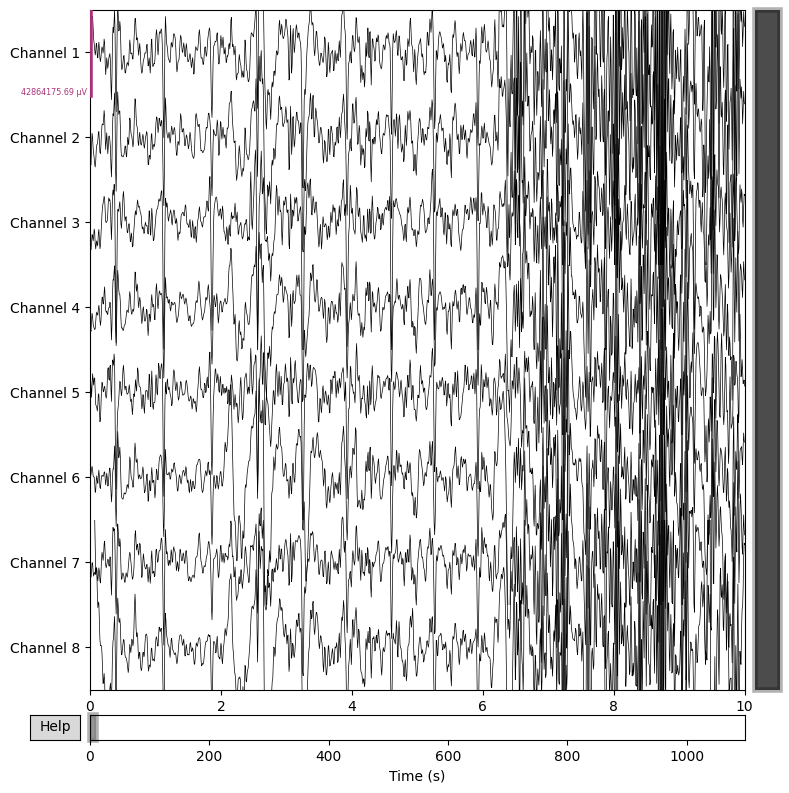

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw_2.notch_filter(60)

# Research said filter to alpha/beta waves
raw_2.filter(l_freq=3, h_freq=30)
raw_2.plot_psd()
raw_2.plot(scalings='auto')

In [ ]:
filteredData_2 = raw_2._data
num_samples_2 = len(filteredData_2[0])
filteredData_2 = np.append(filteredData_2, np.zeros([1, num_samples_2]), 0)
#print(filteredData[8])

# mark samples
list_of_times_2 = [[7, 37], [52, 82], [113, 126], [142, 172], [188, 217], [232, 262], [277, 307], [322, 352], [367, 397], [412, 442], [648, 678], [693, 722], [738, 767], [782, 812], [828, 857], [872, 902], [918, 947], [962, 992], [1008, 1037], [1052, 1082]]
# for interval in list_of_times_2:
#   interval[0] *= sfreq
#   interval[1] *= sfreq
for interval in list_of_times_2:
  for i in range(interval[0], interval[1]):
    filteredData_2[8, i] = 1

In [ ]:
# save model
import pickle
pickle.dump(filteredData, open('oliverjawclench1.pk1', 'wb'))
pickle.dump(filteredData_2, open('oliverjawclench2.pk1', 'wb'))

# awesome data training part (very cool)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# filteredData_2_trim = [[],[],[],[],[],[],[],[],[]]

# for i in range(0,9):
#   filteredData_2_trim[i] = filteredData_2[i][0:2000]

# filteredData_2 = filteredData_2_trim

trainingData = [[],[],[],[],[],[],[],[],[]]
trainingDataSegmented = [[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]],[[]]]

for i in range(0,9):
  trainingData[i] = list(filteredData[i]) + list(filteredData_2[i])
  for j in range(0, len(trainingData[i])):
    if j // 250 >= len(trainingDataSegmented[i]):
      trainingDataSegmented[i].append([])
    trainingDataSegmented[i][j // 250].append(trainingData[i][j])
  trainingDataSegmented[i].pop()

#trainingData = filteredData_2

x = np.array([np.array(trainingDataSegmented[0]), np.array(trainingDataSegmented[1]), np.array(trainingDataSegmented[2]), np.array(trainingDataSegmented[3]), np.array(trainingDataSegmented[4]), np.array(trainingDataSegmented[5]), np.array(trainingDataSegmented[6]), np.array(trainingDataSegmented[7])])
x = np.swapaxes(x, 0, 1)

#x = x.transpose()
y = np.array(trainingDataSegmented[8])
tmp = []
for i in range(y.shape[0]): # This loop turns the sample readings into seconds
  tmp.append(y[i][0])
y = np.array(tmp)

# Split dataset into training set and test set
# x sample
# y 0 or 1

# now we need to "flatten" the 3d array into a 2d one
xsamples, x1, x2 = x.shape
x = x.reshape((xsamples,x1*x2))

print(x.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

#scaler = StandardScaler()

scaler = RobustScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# for i in range(X_train.shape[1]):
#   scalers[i] = RobustScaler()
#   X_train_scale[:][i][:] = scalers[i].fit_transform(X_train[:][i][:])
#   X_test_scale[:][i][:] = scalers[i].transform(X_test[:][i][:])


np.savetxt("xtest.txt", X_test_scale)
np.savetxt("ytest.txt", y_test)

X_train_scale.mean(axis=0)
#X_train_scale.std(axis=0)

(1642, 2000) (1642,)


array([-0.05111281, -0.07524309, -0.07950534, ..., -0.04464821,
       -0.05735812, -0.07235724])

In [ ]:
#Import svm model
from sklearn import svm
from sklearn import linear_model

#Create a svm Classifier
classifier = svm.SVC(kernel='rbf')
#classifier = svm.LinearSVC(dual=False)
#classifier = linear_model.SGDClassifier(loss='hinge')

#Train the model using the training sets
classifier.fit(X_train_scale, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test_scale)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9432048681541582


In [ ]:

pickle.dump(classifier, open('jawclenchmodel.pk1', 'wb'))